In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13.4})
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE


LR: 0.842254 (0.013017)
LDA: 0.838111 (0.012397)
KNN: 0.787613 (0.011353)
Decision Tree: 0.662818 (0.016701)
NB: 0.822341 (0.013618)
SVM: 0.825572 (0.010731)
Random
 Forest: 0.802156 (0.010220)
Gradient
 Boosting: 0.840767 (0.014217)


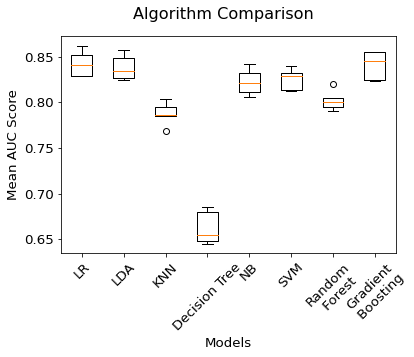

In [8]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', make_pipeline(SMOTE(sampling_strategy = "minority", random_state=42, k_neighbors=10),
                              StandardScaler(),
                              LogisticRegression())))


models.append(('LDA', 
make_pipeline(SMOTE(sampling_strategy = "minority", random_state=42, k_neighbors=10),
                              StandardScaler(),
                              LinearDiscriminantAnalysis())))
models.append(('KNN', make_pipeline(SMOTE(sampling_strategy = "minority", random_state=42, k_neighbors=10),
                              StandardScaler(),
                              KNeighborsClassifier())))
models.append(('Decision Tree', 
make_pipeline(SMOTE(sampling_strategy = "minority", random_state=42, k_neighbors=10),
                              StandardScaler(),
                              DecisionTreeClassifier())))
models.append(('NB', make_pipeline(SMOTE(sampling_strategy = "minority", random_state=42, k_neighbors=10),
                              StandardScaler(),
                              GaussianNB())))
models.append(('SVM', make_pipeline(SMOTE(sampling_strategy = "minority", random_state=42, k_neighbors=10),
                              StandardScaler(),
                              SVC())))
models.append(('Random\n Forest', make_pipeline(SMOTE(sampling_strategy = "minority", random_state=42, k_neighbors=10),
                              StandardScaler(),
                              RandomForestClassifier())))
models.append(('Gradient\n Boosting', make_pipeline(SMOTE(sampling_strategy = "minority", random_state=42, k_neighbors=10),
                              StandardScaler(),
                              GradientBoostingClassifier())))

# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
	kfold = model_selection.StratifiedKFold(5)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring="roc_auc")
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Mean AUC Score")
plt.show()

In [31]:
clf =  make_pipeline(SMOTE(sampling_strategy = "minority", random_state=42, k_neighbors=10),
                              StandardScaler(),
                              LogisticRegression())

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

clf.fit(X_train,y_train)

y_pred_test = clf.predict(X_test)


a =classification_report(y_test,y_pred_test)


In [37]:
print(a)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1291
           1       0.51      0.81      0.62       467

    accuracy                           0.74      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.74      0.76      1758



In [46]:
print(pd.DataFrame(confusion_matrix(y_test, y_pred_test)).to_latex())

\begin{tabular}{lrr}
\toprule
{} &    0 &    1 \\
\midrule
0 &  929 &  362 \\
1 &   91 &  376 \\
\bottomrule
\end{tabular}

